In [42]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import numpy as np

In [43]:
hab_sp_matrix = pd.read_csv('../data/cleaned_data/cleaned_unique_species_hab_matrix.csv',
                            index_col='Genus_Species')

hab_sp_matrix.where(hab_sp_matrix <= 1, 1, inplace=True)

hab_sp_matrix = hab_sp_matrix.loc[(hab_sp_matrix!=0).any(1), (hab_sp_matrix!=0).any(0)]
hab_sp_matrix

C:\Users\cbsither\AppData\Local\Temp\ipykernel_1180\2015219372.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  hab_sp_matrix = hab_sp_matrix.loc[(hab_sp_matrix!=0).any(1), (hab_sp_matrix!=0).any(0)]


,AC,ATR,BAM,BP,COR,CRH,DRN,DTH,FH,FP,...,RPB,SEP,SNW,SPG,STM,STMM,STMRM,STMT,SW,TH
Genus_Species,,,,,,,,,,,,,,,,,,,,,
Anopheles_farauti,1,0,0,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,0,1,0
Anopheles_punctulatus,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Anopheles_koliensis,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
Anopheles_nataliae,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,1,0,0,0,0
Anopheles_solomonis,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Trichoprosopon_vonplesseni,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Shannoniana_schedocyclia,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Culex_marksae,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [44]:
# adds a column with relative habitat occupancy (% total habitats occupied)
hab_sp_matrix['Relative_Habitat_Occupancy'] = (hab_sp_matrix.sum(axis=1) / len(hab_sp_matrix.columns))

# sorts the values for 'Relative_Habitat_Occupancy' from least to greatest
habitat_species_df = hab_sp_matrix.sort_values(by=['Relative_Habitat_Occupancy'])


habitat_species_df

,AC,ATR,BAM,BP,COR,CRH,DRN,DTH,FH,FP,...,SEP,SNW,SPG,STM,STMM,STMRM,STMT,SW,TH,Relative_Habitat_Occupancy
Genus_Species,,,,,,,,,,,,,,,,,,,,,
Culex_usquatus,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.026316
Toxorhynchites_nepenthicola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.026316
Wyeomyia_sabethea,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.026316
Tripteroides_apicotriangulatus,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.026316
Wyeomyia_medioalbipes,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.026316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Anopheles_barbirostris,1,1,0,0,0,0,0,1,1,0,...,0,0,1,1,1,0,0,1,0,0.447368
Aedes_vexans,1,1,1,1,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,0,0.500000
Culex_annulirostris,1,1,1,0,0,0,1,1,1,0,...,1,0,0,1,0,0,0,1,1,0.552632


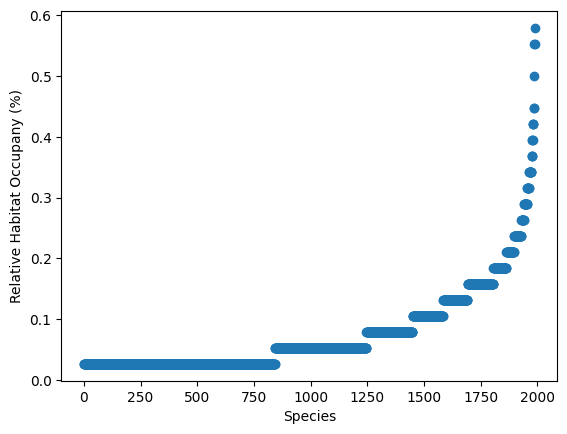

In [45]:

# partitions x and y data
x_val = list(range(0,len(habitat_species_df['Relative_Habitat_Occupancy'])))
y_val = habitat_species_df['Relative_Habitat_Occupancy'].values

plt.scatter(x_val , y_val)
plt.xlabel('Species')
plt.ylabel('Relative Habitat Occupany (%)')
plt.show()

In [46]:

# Sum all rows excluding 'Relative_Habitat_Occupancy' column to get total habitats for each species
habitat_species_df['Total_Habitats'] = habitat_species_df.drop('Relative_Habitat_Occupancy', axis=1).sum(axis=1)

# Find the range of total habitats
max_habitats = int(habitat_species_df['Total_Habitats'].max())
min_habitats = int(habitat_species_df['Total_Habitats'].min())

# Use np.histogram to bin the total habitats and count the number of species in each bin
bins = np.arange(min_habitats, max_habitats + 2)  # +2 to include the right edge of the last bin
species_counts, _ = np.histogram(habitat_species_df['Total_Habitats'], bins=bins)

In [47]:
bins

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23])

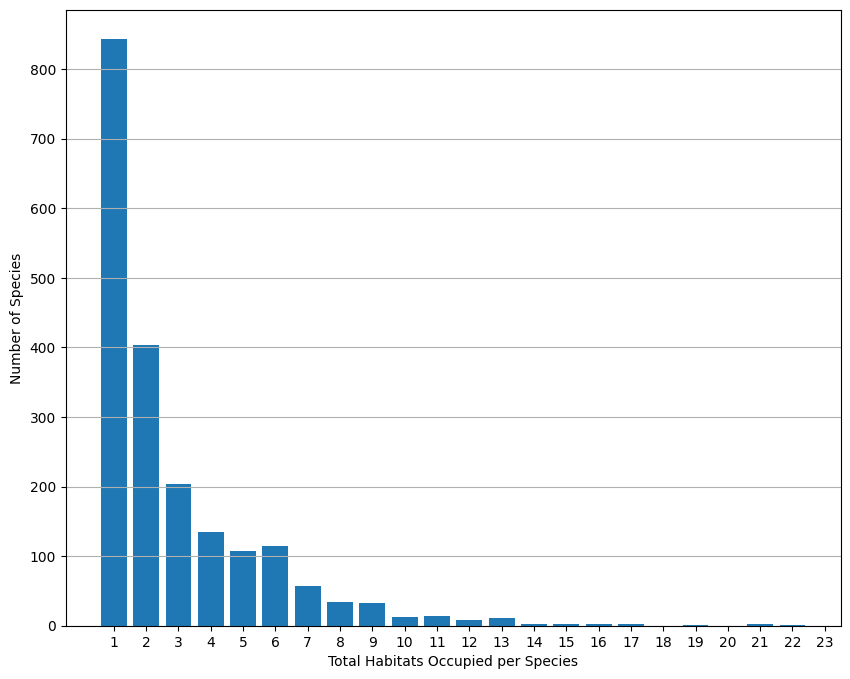

In [51]:
# Create a bar chart
plt.figure(figsize=(10, 8))
plt.bar(bins[:-1], species_counts)  # bins[:-1] to align counts with the left edge of each bin

plt.xlabel('Total Habitats Occupied per Species')
plt.ylabel('Number of Species')
plt.xticks(bins)
plt.grid(axis='y')
plt.savefig('../figures/Species_Habitat_Count.png')

In [56]:
print(species_counts[9:].sum()/1989)
species_counts/1989

0.030165912518853696


array([0.42383107, 0.20261438, 0.1025641 , 0.06737054, 0.05429864,
       0.05731523, 0.02865762, 0.01709402, 0.01608849, 0.00603318,
       0.00703871, 0.00402212, 0.00553042, 0.0015083 , 0.0015083 ,
       0.0015083 , 0.00100553, 0.        , 0.00050277, 0.        ,
       0.00100553, 0.00050277])

In [65]:
habitat_species_df[habitat_species_df['Total_Habitats'] >= 10]['GP'].sum()/60

0.8833333333333333

In [66]:
habitat_species_df[habitat_species_df['Total_Habitats'] >= 10]['AC'].sum()/60

0.85

In [63]:
species_counts

array([843, 403, 204, 134, 108, 114,  57,  34,  32,  12,  14,   8,  11,
         3,   3,   3,   2,   0,   1,   0,   2,   1], dtype=int64)

In [70]:
habitat_species_df[habitat_species_df['Total_Habitats'] >= 10].to_csv('D:/Dropbox/Github_Repos/Larval_Habitat_NLP_Classifier/data/cleaned_data/ten_or_more_habs.csv')

In [67]:
habitat_species_df.columns

Index(['AC', 'ATR', 'BAM', 'BP', 'COR', 'CRH', 'DRN', 'DTH', 'FH', 'FP', 'FPP',
       'GP', 'GPB', 'GPT', 'HGW', 'IC', 'LA', 'LGN', 'LK', 'ML', 'MRB', 'MRH',
       'PO', 'POM', 'RC', 'RD', 'RIVM', 'RP', 'RPB', 'SEP', 'SNW', 'SPG',
       'STM', 'STMM', 'STMRM', 'STMT', 'SW', 'TH',
       'Relative_Habitat_Occupancy', 'Total_Habitats'],
      dtype='object')

In [76]:
habitat_species_df.loc[['Aedes_aegypti', 'Aedes_albopictus']]

,AC,ATR,BAM,BP,COR,CRH,DRN,DTH,FH,FP,...,SNW,SPG,STM,STMM,STMRM,STMT,SW,TH,Relative_Habitat_Occupancy,Total_Habitats
Genus_Species,,,,,,,,,,,,,,,,,,,,,
Aedes_aegypti,1,0,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0.236842,9
Aedes_albopictus,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,1,0.289474,11
